In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [31]:
import glob

text_ru = ''
list_of_files = glob.glob('./*_[0-9].txt')
for file_name in list_of_files:
    with open(file_name, 'r') as f:
        text_ru += f.read().lower()

In [32]:
text_ru_reg = re.sub('[^а-я ]','', text_ru)

In [42]:
sns.set(font_scale=1)

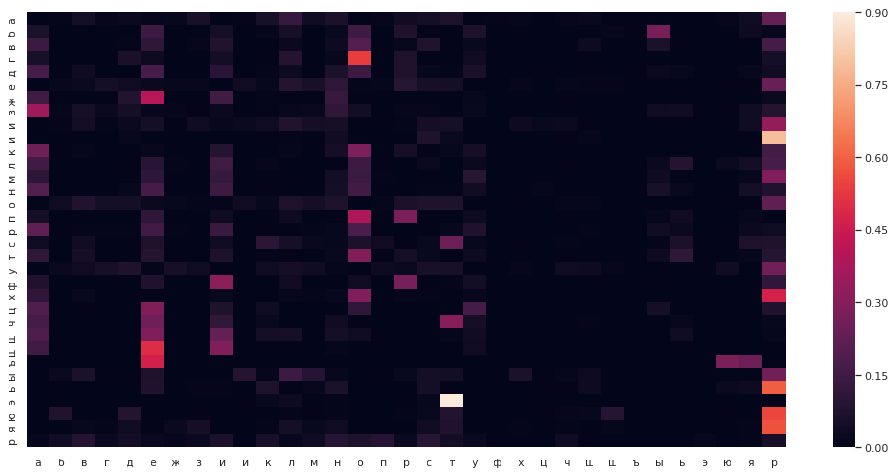

In [45]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS_RU = {l: i for i, l in enumerate(RUSSIAN)}

probabilities_ru = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text_ru_reg[:-1], text_ru_reg[1:]):
    probabilities_ru[POS_RU[cp], POS_RU[cn]] += 1
    
probabilities_ru = (probabilities_ru / probabilities_ru.sum(axis=1)[:, None])

df_ru = pd.DataFrame(probabilities_ru, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(17,8))
sns.heatmap(df_ru,xticklabels=RUSSIAN[:-1] + 'p',yticklabels=RUSSIAN[:-1] + 'p') #пришлось заменить знако пробела на p, так как с ним почему то не отображался
plt.show()

In [38]:
df_ru.columns

Index(['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н',
       'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы',
       'ь', 'э', 'ю', 'я', ' '],
      dtype='object')

In [57]:
start = POS_RU['п']
end = POS_RU['р']
prior = 1. / len(RUSSIAN)
prop_itog = 0
for c in RUSSIAN:
    proba = prior * probabilities_ru[start, POS_RU[c]]  
    for c1 in RUSSIAN:
        proba *= probabilities_ru[POS_RU[c1], end]
        if proba > 0:
            prop_itog += proba
            print(''.join(['п', c, c1, 'р']), proba)


паар 6.548588855486646e-05
пабр 4.9751457794759505e-06
павр 8.01666307611479e-08
пагр 5.611257027376158e-09
падр 3.96051276145018e-10
паер 3.696765683135222e-11
пажр 1.0559170760169158e-14
пазр 1.4733975842533583e-16
паир 1.3222919835622029e-18
пайр 2.6158607898243735e-21
пакр 1.3925274526205877e-22
палр 2.4145851115725926e-27
памр 4.355452766918841e-30
панр 5.027737236059092e-33
паор 3.202305594156078e-34
папр 8.899375949947872e-35
парр 4.018841912152618e-38
паср 2.6031656699699614e-40
патр 1.3701989390610778e-41
паур 3.419804970620931e-43
пафр 9.320801490718053e-44
пахр 1.0775221068072261e-45
пвар 2.080898905461279e-08
пвбр 1.5809169937959802e-09
пввр 2.5473984989243053e-11
пвгр 1.7830495797191477e-12
пвдр 1.258504213997515e-13
пвер 1.1746951646441761e-14
пвжр 3.3553132380582008e-18
пвзр 4.681911611863229e-20
пвир 4.2017539992443685e-22
пвйр 8.312236383299566e-25
пвкр 4.4249362968560136e-26
пвлр 7.672656852788663e-31
пвмр 1.3840015147501878e-33
пвнр 1.597628610123639e-36
пвор 1.01757

In [62]:
print('Вероятность встретить слово, начинающееся на п и заканчивающееся на р равна {:f}'.format(prop_itog))

Вероятность встретить слово, начинающееся на п и заканчивающееся на р равна 0.001358


In [70]:
s = []
start = 'б'
s.append(start)
length =  8
for i in range(length):
    index = POS_RU[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities_ru[index])
    s.append(next_char)

print (''.join(s))

баннеримо


# Прогноз с использованием HMM

In [72]:
from hmmlearn.hmm import GaussianHMM

In [73]:
series = pd.read_csv("Series/international-airline-passengers.csv")["Count"]

In [149]:
values = series.values.reshape(-1,1)

In [100]:
scores = []
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    score = model.score(values)
    scores.append(score)
    print (n, score)

1 -893.1837902090576
2 -803.8479638762096
3 -767.0819417008187
4 -743.9977519551942
5 -731.3632757488308
6 -706.6054742744972
7 -694.9945555321262
8 -673.933680069119
9 -664.2465557766182
10 -656.168431648046
11 -650.2620800745804
12 -644.6129988457607
13 -638.5017481134504
14 -633.3860900573942
15 -630.5078477577892
16 -622.1752217320042
17 -618.3606545808326
18 -604.934026317936
19 -604.5724503881863


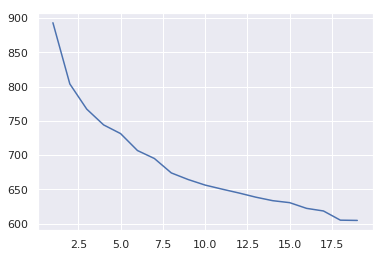

In [101]:
plt.plot(range(1, 20),abs(np.array(scores)));

Возьмем 10

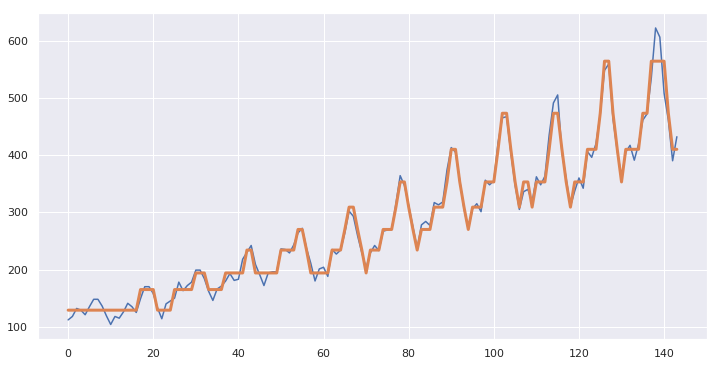

In [90]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3);

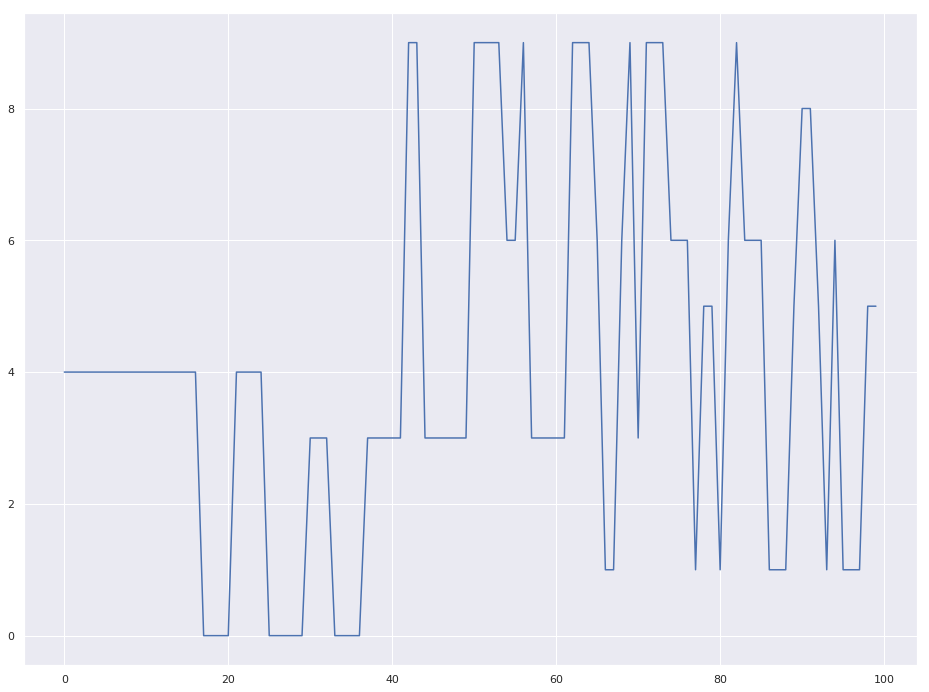

In [91]:
plt.figure(figsize=(16,12))
plt.plot(labels[:100])
plt.show()

In [92]:
cur_value = labels[-1]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [93]:
new_series = np.concatenate((values, np.array(predictions)))

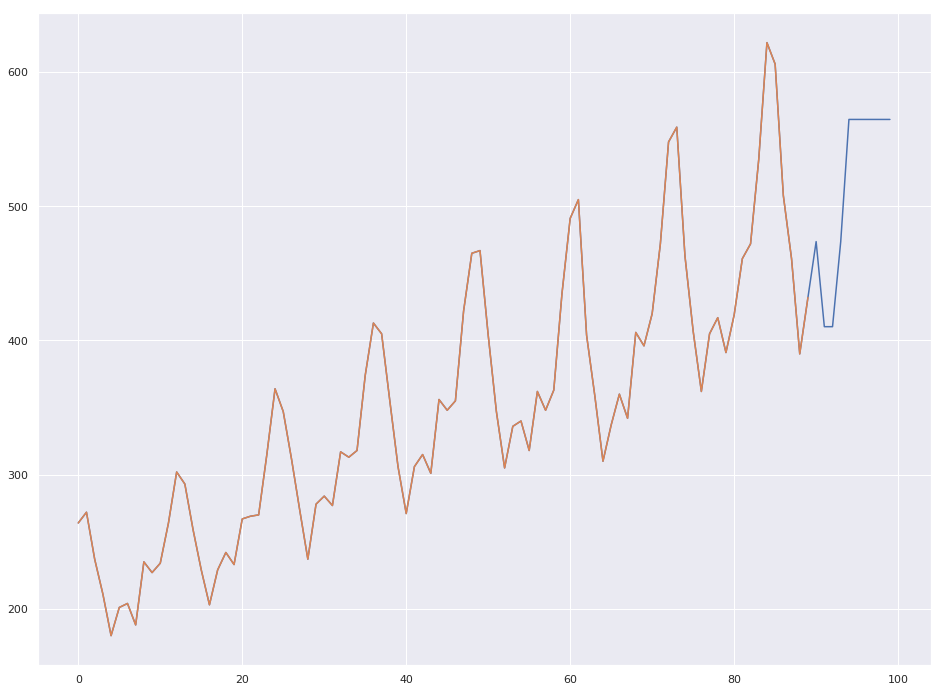

In [94]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()

In [95]:
cur_value = labels[-11]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

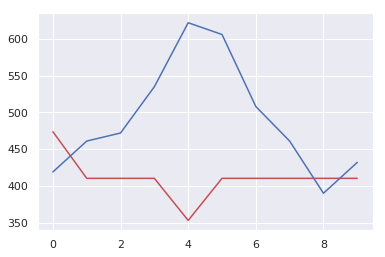

In [96]:
plt.plot(predictions, 'r-')
plt.plot(values[-10:])
plt.show();

Прогнозная сила получилась не очень. Попробуем взять другое число компонент

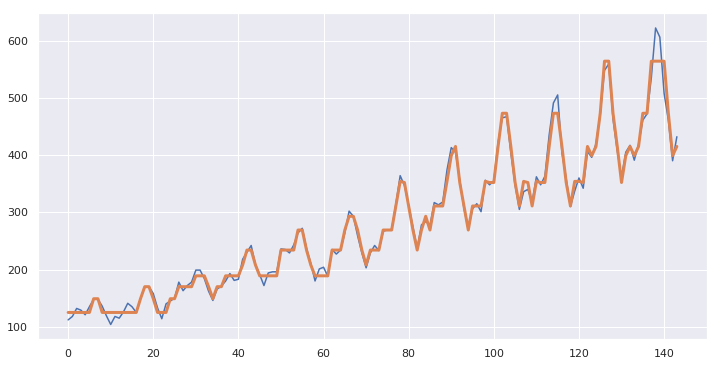

In [147]:
model = GaussianHMM(n_components=15,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3);

In [148]:
cur_value = labels[-1]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(15, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [150]:
new_series = np.concatenate((values, np.array(predictions)))

In [151]:
new_series.shape

(154, 1)

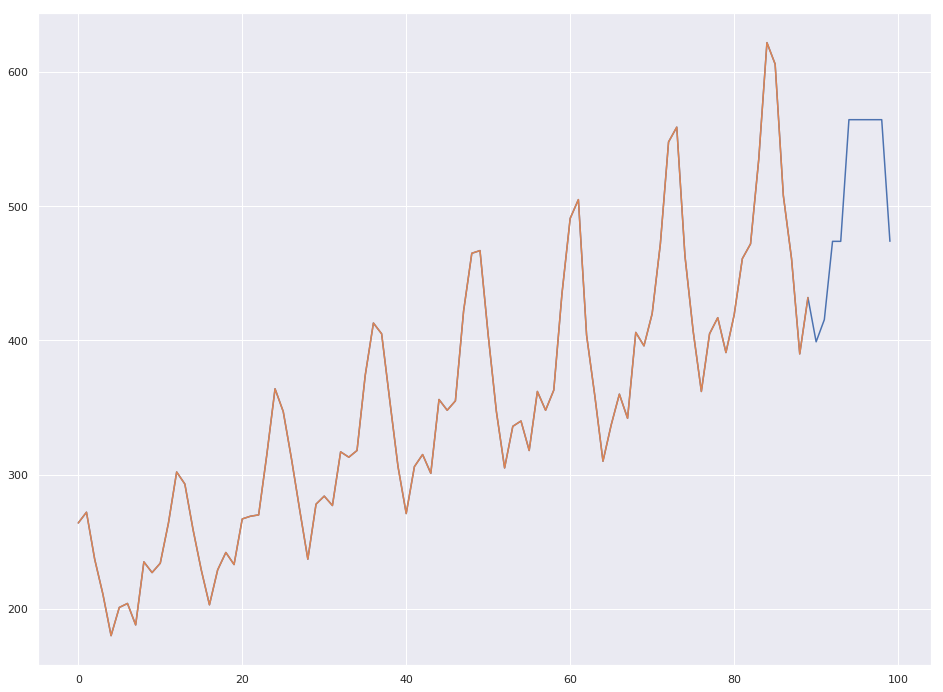

In [152]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()

In [177]:
cur_value = labels[-11]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(15, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

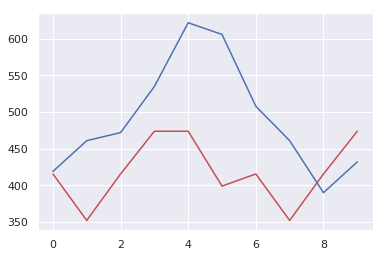

In [178]:
plt.plot(predictions, 'r-')
plt.plot(values[-10:])
plt.show();

С увеличением числа компонент, предсказания получились лучше.